In [0]:
directory = '/content/drive/My Drive/Colab Notebooks/violence-detection/dataset/train/1 FPS'

In [0]:
#!unzip '/content/drive/My Drive/Colab Notebooks/violence-detection/dataset.zip' -d '/content/drive/My Drive/Colab Notebooks/violence-detection/'

In [4]:
import os
import cv2
import time
import numpy as np
import numpy as np
import os
import cv2
import keras
import sklearn
import pandas
from time import time
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import to_categorical
from keras.models import load_model
from keras.layers import *
from keras import layers
from keras import Model
from keras.callbacks import TensorBoard
from keras import optimizers
import matplotlib.pyplot as plt
from keras.applications import *
from keras.preprocessing import image
from sklearn.metrics import classification_report
import time
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from keras.applications.resnet50 import preprocess_input
from keras.applications import *
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


Using TensorFlow backend.


In [0]:
violence_path = os.path.join(directory,'violent') 
nonviolence_path = os.path.join(directory,'non_violent')


In [0]:
print(len(violent_frames))
print(len(non_violent_frames))
#violent_frames = violent_frames[:-163]
#print(len(violent_frames))
print(violent_frames[0])
#print(non_violent_frames[0])

In [7]:
def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files1 = sorted([os.path.join(path, 'violent', file)
         for file in os.listdir(path + "/violent") if (file.endswith('.jpg'))])

    image_files2 = sorted([os.path.join(path, 'non_violent', file)
         for file in os.listdir(path + "/non_violent") if (file.endswith('.jpg'))])
    
    image_files = image_files1 + image_files2
    return image_files
image_files = loadImages(os.path.join(directory))
print(image_files)

['/content/drive/My Drive/Colab Notebooks/violence-detection/dataset/train/1 FPS/violent/11.mp4frame0.jpg', '/content/drive/My Drive/Colab Notebooks/violence-detection/dataset/train/1 FPS/violent/11.mp4frame1.jpg', '/content/drive/My Drive/Colab Notebooks/violence-detection/dataset/train/1 FPS/violent/11.mp4frame2.jpg', '/content/drive/My Drive/Colab Notebooks/violence-detection/dataset/train/1 FPS/violent/11.mp4frame3.jpg', '/content/drive/My Drive/Colab Notebooks/violence-detection/dataset/train/1 FPS/violent/11.mp4frame4.jpg', '/content/drive/My Drive/Colab Notebooks/violence-detection/dataset/train/1 FPS/violent/11.mp4frame5.jpg', '/content/drive/My Drive/Colab Notebooks/violence-detection/dataset/train/1 FPS/violent/11.mp4frame6.jpg', '/content/drive/My Drive/Colab Notebooks/violence-detection/dataset/train/1 FPS/violent/14765.mp4frame0.jpg', '/content/drive/My Drive/Colab Notebooks/violence-detection/dataset/train/1 FPS/violent/14765.mp4frame1.jpg', '/content/drive/My Drive/Colab

In [0]:
s = ["/content/drive/My Drive/Colab Notebooks/violence-detection/dataset/train/1 FPS/non_violent/1.mp4frame0.jpg"]
st = image_files[5]
st1 = image_files[-5]
print(st)
print(st1)
x = st.split('/')
x1 = st1.split('/')
print(x[-1],x[-2])
print(x1[-1],x1[-2])

In [0]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Preprocessing
def processing(data):
    # loading image
    # Getting 3 images to work with 
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
    print('Original size',img[0].shape)
    # --------------------------------
    # setting dim of the resize
    height = 224
    width = 224
    dim = (width, height)
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)

    # Checcking the size
    print("RESIZED", res_img[1].shape)
    
    # Visualizing one of the images in the array
    original = res_img[1]
    display_one(original)

Original size (1080, 1920, 3)
RESIZED (224, 224, 3)


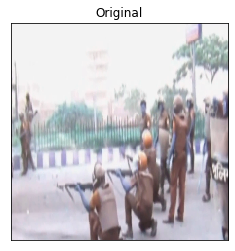

In [9]:
processing(image_files)


In [0]:
 s = ["/content/drive/My Drive/Colab Notebooks/violence-detection/dataset/train/1 FPS/non_violent/1.mp4frame0.jpg"]
 #violent_frames = []
#non_violent_frames = []

#for frame in os.listdir(violence_path):
#    frame = cv2.imread(os.path.join(violence_path,frame))
#    violent_frames.append(frame)


#for frame in os.listdir(nonviolence_path):
#    frame = cv2.imread(os.path.join(nonviolence_path,frame))
#    non_violent_frames.append(frame)


violent_frames = []
non_violent_frames = []

for st in image_files:
    img_path = st
    x = st.split('/')
    name = x[-2]
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    
    if(name == "violent"):
      violent_frames.append(img_data)
    else:
      non_violent_frames.append(img_data)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    
print(len(violent_frames))
print(len(non_violent_frames))
violent_frames = violent_frames[:-163]
print(len(violent_frames))

In [0]:
# feature extraction
# input shape : (N_SAMPLES,TIMESTEP,WIDTH,HEIGHT,CHANNEL)
def create_seq(violent_frames, non_violent_frames): 
    print("Creating Sequence... ")
    print(type(violent_frames))
    violent_vid = []
    non_violent_vid = []

    i = 0
    while(i < len(violent_frames)):
        violent_vid.append(violent_frames[i:i+30])
        i = i+30

    i = 0
    while(i < len(non_violent_frames)):
        non_violent_vid.append(non_violent_frames[i:i+30])
        i = i+30
        
    violent_vid = np.asarray(violent_vid)
    non_violent_vid = np.asarray(non_violent_vid)
    
    return violent_vid, non_violent_vid


In [0]:
def result(x,y):
    
    print("Generating result...")
    
    pred = model.predict(x)
#     print('First prediction:', pred)
    
    score = model.evaluate(x, y,verbose=1)
    print("-----------------------------")
    print('Test accuracy:', score[0])
    #print('Test accuracy:', score[1])
    
    prediction = []
    for p in pred:
        if(p >= 0.5):
            prediction.append(1)
        else:
            prediction.append(0)
    print("-----------------------------")
    print("Classification report")
    print("-----------------------------")
    print(classification_report(y, prediction))
    
    print("-----------------------------")
    print("Confusion Matrix")
    print("-----------------------------")
    conf_mat = confusion_matrix(y, prediction)
    print(conf_mat)
    

In [0]:
def preprocess_lstm(violent_frames, non_violent_frames, features):
    
    print("Preprocessing data... ")
    violent_features = features[0:10]
    non_violent_features = features[0:10]

    print("Violent features: ", violent_features.shape)
    print("Non Violent features: ", non_violent_features.shape)

    violent_vid,non_violent_vid = create_seq(violent_features, non_violent_features)
    violent_y, non_violent_y = np.zeros(len(violent_vid)), np.ones(len(non_violent_vid))
    print("Violent Video Seq: ", violent_vid.shape,"Non_violent video Seq: ", non_violent_vid.shape)
    print("Violent Label: ", violent_y.shape, "Non_violent Label: ", non_violent_y.shape)

    test_x = np.vstack((violent_vid,non_violent_vid))
    test_y = np.append(violent_y, non_violent_y)

    print("Total data: ", test_x.shape)
    print("Total target: ", test_y.shape)

    test_x = np.reshape(test_x, (test_x.shape[0],test_x.shape[1],np.prod(test_x.shape[2:])))
    print("(LSTM) After Rehshape: ", test_x.shape)
    
    return test_x,test_y

In [17]:
# main file (most important one)

violent_frames = []
non_violent_frames = []

for st in image_files:
    img_path = st
    x = st.split('/')
    name = x[-2]
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    
    if(name == "violent"):
      violent_frames.append(img_data)
    else:
      non_violent_frames.append(img_data)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    
print(len(violent_frames))
print(len(non_violent_frames))
violent_frames = violent_frames[:-163]
print(len(violent_frames))

669
506
506


In [0]:
def feature_extract(violent_features, non_violent_features, model):
    
    print("Extracting feature... ")
    
    print ("Before Feature extraction: ")
    #print(violent_frames.shape,non_violent_frames.shape)
    all_data = np.vstack((violent_frames,non_violent_frames))
    print("Adding all data: ", all_data.shape)
    all_data = np.expand_dims(all_data, axis = 0)
    print("Adding all data: ", all_data.shape)
    #creates feature descriptors
    desc = preprocess_input(all_data)


    #s = ["/content/drive/My Drive/Colab Notebooks/violence-detection/dataset/train/1 FPS/non_violent/1.mp4frame0.jpg"]
    for st in image_files:
      img_path = st
      img = image.load_img(img_path, target_size=(224, 224))
      img_data = image.img_to_array(img)
      img_data = np.expand_dims(img_data, axis=0)
      img_data = preprocess_input(img_data)
    print(img_data.shape)

    if(model == 'resnet50'):
        loaded_model = ResNet50(input_shape=(224,224,3), weights = 'imagenet', include_top=False)
    elif(model == 'vgg19'):
        loaded_model = VGG19(input_shape=(224,224,3), include_top=False)
    elif(model == 'vgg16'):
        loaded_model = VGG16(input_shape=(224,224,3), include_top=False)
    else:
        print("Please give model name - 'resnet50', 'vgg19', 'vgg16'")
        
    loaded_model = Model(loaded_model.input,loaded_model.output)
    features = loaded_model.predict(img_data,batch_size=10,verbose=1)

    print ("After Feature extraction: ", features.shape)
    
    return features

In [46]:
# Model Testing
# Resnet LSTM

violent_frames = []
non_violent_frames = []

for st in image_files:
    img_path = st
    x = st.split('/')
    name = x[-2]
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    
    if(name == "violent"):
      violent_frames.append(img_data)
    else:
      non_violent_frames.append(img_data)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    
print(len(violent_frames))
print(len(non_violent_frames))
violent_frames = violent_frames[:-163]
print(len(violent_frames))

features = feature_extract(violent_frames, non_violent_frames, 'resnet50')

test_x, test_y = preprocess_lstm(violent_frames, non_violent_frames, features)

model = Sequential()

model.add(CuDNNLSTM(50, input_shape=(test_x.shape[1],test_x.shape[2]), return_sequences=False))
model.add(Dense(1,activation='sigmoid'))
#model.load_weights('resnet_LSTM.h5')
model.summary()
optimizer = optimizers.adam(lr=0.001,decay=0.004)
model.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])


result(test_x,test_y)

669
506
506
Extracting feature... 
Before Feature extraction: 
Adding all data:  (1012, 224, 224, 3)
Adding all data:  (1, 1012, 224, 224, 3)
(1, 224, 224, 3)


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


1/1 [==============================] - 5s 5s/step
After Feature extraction:  (1, 7, 7, 2048)
Preprocessing data... 
Violent features:  (1, 7, 7, 2048)
Non Violent features:  (1, 7, 7, 2048)
Creating Sequence... 
<class 'numpy.ndarray'>
Violent Video Seq:  (1, 1, 7, 7, 2048) Non_violent video Seq:  (1, 1, 7, 7, 2048)
Violent Label:  (1,) Non_violent Label:  (1,)
Total data:  (2, 1, 7, 7, 2048)
Total target:  (2,)
(LSTM) After Rehshape:  (2, 1, 100352)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_5 (CuDNNLSTM)     (None, 50)                20080800  
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 20,080,851
Trainable params: 20,080,851
Non-trainable params: 0
_________________________________________________________________
Generating result...
2/2 [=======================

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
model.save('./my_model.h5')

In [0]:
img_path = "/content/drive/My Drive/Colab Notebooks/violence-detection/dataset/train/1 FPS/non_violent/1.mp4frame0.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)

model.predict(img_data)

  


In [0]:
# Model Testing
# vgg19 LSTM

features = feature_extract(violent_frames, non_violent_frames, 'vgg19')
test_x, test_y = preprocess_lstm(features)

model = Sequential()
model.add(CuDNNLSTM(50, input_shape=(test_x.shape[1],test_x.shape[2]), return_sequences=False, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1,activation='sigmoid'))
model.load_weights('vgg19_LSTM.h5')
model.summary()
optimizer = optimizers.adam(lr=0.001,decay=0.004)
model.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])

result(test_x,test_y)

In [0]:
# Model Testing
# vgg16 LSTM

features = feature_extract(violent_frames, non_violent_frames, 'vgg16')
test_x, test_y = preprocess_lstm(features)

model = Sequential()
model.add(CuDNNLSTM(50, input_shape=(test_x.shape[1],test_x.shape[2]), return_sequences=False, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1,activation='sigmoid'))
model.load_weights('vgg16_LSTM.h5')
model.summary()
optimizer = optimizers.adam(lr=0.001,decay=0.004)
model.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])

result(test_x,test_y)

In [0]:
# stn : spatial transformer networks
!pip install utils

import utils
from utils import get_initial_weights
from layers import BilinearInterpolation

In [0]:
def build_model(x, model_weights):
    
    num_classes=1
    image = Input(shape=(x.shape[1], x.shape[2], x.shape[3]))

    locnet = Conv2D(2, (1, 1))(image)
    locnet = Conv2D(2, (1, 1))(locnet)
    locnet = Flatten()(locnet)
    locnet = Dense(5)(locnet)
    locnet = Activation('relu')(locnet)

    weights = 'imagenet'

    locnet = Dense(6, weights=weights)(locnet)

    x = BilinearInterpolation((3,3))([image, locnet])

    x = Conv2D(2, (1, 1), padding='same')(x)
    x = Activation('relu')(x)

    x = Conv2D(2, (1, 1))(x)
    x = Activation('relu')(x)

    x = Flatten()(x)
    x = Dense(64)(x)
    x = Activation('relu')(x)
    x = Dense(num_classes)(x)
    x = Activation('sigmoid')(x)
    model = Model(inputs=image, outputs=x)

    model.summary()
    adam = optimizers.Adam(lr=.001)
    model.load_weights(model_weights)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    
    return model
    

In [0]:
# resnet 

features = feature_extract(violent_frames, non_violent_frames, 'resnet50')
violent_y, non_violent_y = np.zeros(240), np.ones(240)

test_x = features
test_y = np.append(violent_y, non_violent_y)

model = build_model(test_x,'resnet_att.h5')

result(test_x,test_y)

In [0]:
# vgg19

features = feature_extract(violent_frames, non_violent_frames, 'vgg19')
violent_y, non_violent_y = np.zeros(240), np.ones(240)

test_x = features
test_y = np.append(violent_y, non_violent_y)

model = build_model(test_x,'vgg19_att.h5')

result(test_x,test_y)


In [0]:
# vgg16

features = feature_extract(violent_frames, non_violent_frames, 'vgg16')
violent_y, non_violent_y = np.zeros(240), np.ones(240)

test_x = features
test_y = np.append(violent_y, non_violent_y)

model = build_model(test_x,'vgg16_att.h5')

result(test_x,test_y)